# Skip Gram

<img src="https://miro.medium.com/v2/resize:fit:1400/1*ygnAlYq2zMy9SrJl0GfdPA.png" width="500">

#
<img src="https://miro.medium.com/v2/resize:fit:1142/format:webp/1*14BRxe0XMDGNDpz0gsazQw.png" width="500">


# Node2vec

<img src="https://miro.medium.com/v2/resize:fit:800/format:webp/1*LunBhYpRf3OB36HIC0g9AA.png" width="500">

# 

<img src="https://miro.medium.com/v2/resize:fit:962/format:webp/1*bq-EwVdSBixlklrPehI1_w.png" width="300">

Before we start with an explanation of the node2vec algorithm, let's divide it into 3 unique steps:

1. Edge transition probability calculation
2. Walk sampling
3. Embedding calculation

## Edge transition probability calculation
In order to sample a walk, we move from one node to another in the direction of the edge. If the edge is undirected, you can move in any direction across the edge.

<b>homophily hypothesis</b>, nodes that are highly interconnected and belong to similar network clusters (communities) should be embedded closely together. In contrast, under the <b> structural equivalence hypothesis </b>, nodes that have similar structural roles (like hubs for example) in networks should be embedded closely together.

<img src="https://miro.medium.com/v2/resize:fit:1000/format:webp/1*tCIyPGSCNExZWuklA0TGjA.png" width="400">

It was observed in a research paper that BFS and DFS have a key role in producing representations that reflect either of the above equivalences (homophily or structural equivalence). 
- The neighborhoods sampled by <b> BFS </b> lead to embeddings that correspond closely to <b> structural equivalence </b>.
- with <b>DFS</b>, nodes more accurately reflect the macro-view of the network which is essential in inferring communities, <b>homophily equivalence</b>.

<img src="https://www.freelancinggig.com/blog/wp-content/uploads/2019/02/BFS-and-DFS-Algorithms.png" width="600">
Back to the parameters <b>p and q</b>. By setting the different values of parameters before the walk sampling begins, you can achieve more <b>BFS or DFS</b> like walks. This means that with one algorithm, you can find <b> communities in a graph </b> or <b>hubs</b>.

## Normalized Transition Probability
<img src="https://memgraph.com/images/blog/how-node2vec-works/memgraph-transitions-from-node-u.png" width="300">
The <b>sum Z</b> of all edge weights from node u is Z=20. In order to find the probability of moving from node u to any other node (v, x, y), we can divide each edge weight <b>wᵤᵥ=6, wᵤₓ=10, wᵤᵧ=4 with 20</b>, and we will get <b>wᵤᵥ=0.3, wᵤₓ=0.5, wᵤᵧ=0.2</b>

## Parameters p and q
Let's first define what parameters p and q mean and then we will explain how they work on a simple case:

- <b>p</b> - also called the return parameter. It controls the likelihood of immediately returning to a node we just visited in a walk.
- <b>q</b> - the in-out parameter. It controls how likely we are to stay in the neighborhood of node u, or are we more likely to visit nodes further away from node u.

We don't use p and q directly, but <b>1/p and 1/q</b>. Till now, our unnormalized transition probability was πᵤᵥ=wᵤᵥ. From now on, our unnormalized transition probability will be <b>πᵤᵥ=α(t,v) * wᵤᵥ.</b>

## Example with node t, x, and v 
<img src="https://memgraph.com/images/blog/how-node2vec-works/memgraph-graph-walking.png" width="500">

- If there is <b>no edge from node v to node t</b>, then transition probability <b>πᵤᵥ = wᵤᵥ * 1/q</b>. This is example 1 in our picture below.
- If <b>there is an edge from node v to node t</b>, then transition probability <b>πᵤᵥ = wᵤᵥ * 1</b>. This is example 2 in our picture below.
- No matter whether there is an edge or there is no edge from node v to node t, the transition probability is <b>πₜᵤ=wₜᵤ * 1/p</b> since it is our <b>start node</b>

<img src="https://memgraph.com/images/blog/how-node2vec-works/memgraph-walk-calculation.png" width="700">

- If we want to sample nodes in a more DFS then make our parameter q very small because 1/q would be a big number
- If we want to sample nodes in a more BFS then make our parameter p very small because 1/p would be a big number

In [1]:
# !pip install node2vec

In [2]:
import networkx as nx
from node2vec import Node2Vec

# Sample text data
text_data = [
    "apple is a fruit",
    "banana is also a fruit",
    "carrot is a vegetable",
    "fruit is delicious",
    "vegetables are healthy",
]

# Tokenize the text data into words
words = [sentence.split() for sentence in text_data]

# Create a graph
graph = nx.Graph()

# Add nodes and edges based on word relationships
for sentence in words:
    for i in range(len(sentence)):
        for j in range(i + 1, len(sentence)):
            word1 = sentence[i]
            word2 = sentence[j]
            graph.add_node(word1)
            graph.add_node(word2)
            graph.add_edge(word1, word2)

# Precompute probabilities and generate walks
node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)

/Users/muhamadsyukron/opt/anaconda3/envs/youtube/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating walks (CPU: 3): 100%|██████████| 50/50 [00:00<00:00, 326.18it/s]


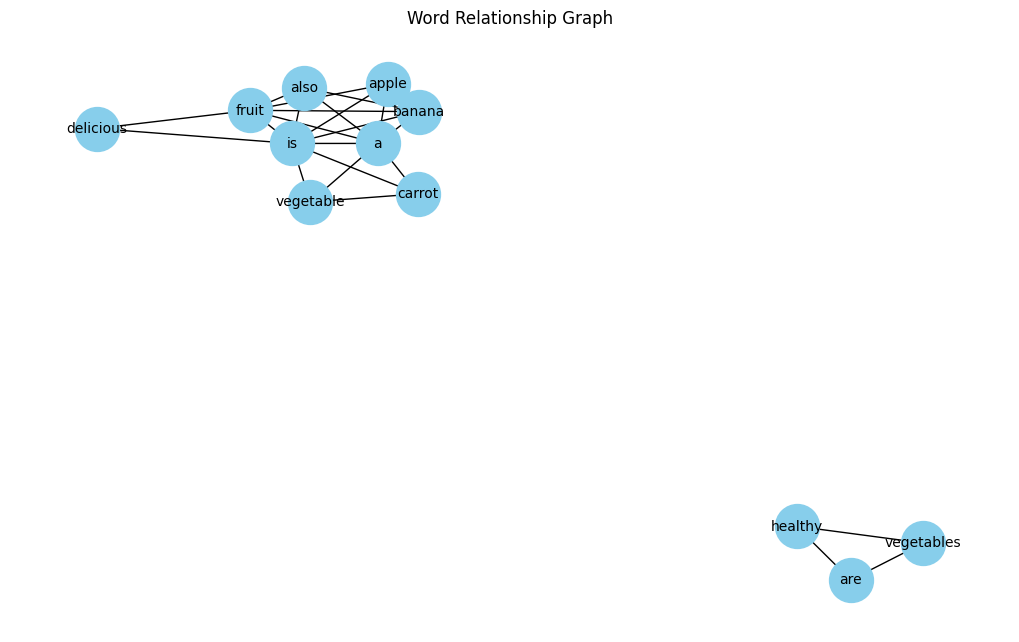

In [4]:
# Visualize the graph
import matplotlib.pyplot as plt
pos = nx.spring_layout(graph, seed=42)  # Seed for reproducibility

plt.figure(figsize=(10, 6))
nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=10, font_color='black')
plt.title("Word Relationship Graph")
plt.show()

In [6]:
# Retrieve word embeddings from the Node2Vec model
word_embeddings = {word: model.wv[word] for word in graph.nodes()}

# Example: Get the embedding for the word "apple"
embedding_for_apple = word_embeddings.get("manchester")

# You can now use the embeddings for various NLP tasks
print("Embedding for 'manchester':")
print(embedding_for_apple)


Embedding for 'apple':
None
